Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


Change Directory to Working Directory

In [0]:
import os

#print(os.getcwd())
os.chdir('/content/gdrive/My Drive/132A/Project')
!ls


 16QAM		     LLRs_4QAM_10.png   loss_16QAM_15.png   loss_BPSK_20.png
 4QAM		     LLRs_4QAM_15.png   loss_4QAM_10.png    Mixed
 BPSK		     LLRs_4QAM_20.png   loss_4QAM_15.png    Parameters.gsheet
'BPSK Trash Data'    LLRs_BPSK_10.png   loss_4QAM_20.png    Plots
 LLRs_16QAM_10.png   LLRs_BPSK_15.png   loss_BPSK_10.png
 LLRs_16QAM_15.png   LLRs_BPSK_20.png   loss_BPSK_15.png


Load Data

In [0]:
import numpy as np
import pandas as pd
import scipy.io as sio


def unison_shuffled_copies(a, b, c, d, e, f):
    assert (len(a) == len(b)) and (len(a) == len(c)) and (len(b) == len(c)) and (len(a)==len(d)) and (len(a)==len(e)) and (len(a)==len(f))
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p], d[p], e[p], f[p]

sym_r = []
sym_i = []
LLR0 = []
LLR1 = []
LLR2 = []
LLR3 = []
for i in range(4):
  x = sio.loadmat('16QAM/Raw Data/20 dB/16QAM_sym_20_' + str(i+1) + '.mat')
  y0 = sio.loadmat('16QAM/Raw Data/20 dB/16QAM_LLR_b0_20_' + str(i+1) + '.mat')
  y1 = sio.loadmat('16QAM/Raw Data/20 dB/16QAM_LLR_b1_20_' + str(i+1) + '.mat')
  y2 = sio.loadmat('16QAM/Raw Data/20 dB/16QAM_LLR_b2_20_' + str(i+1) + '.mat')
  y3 = sio.loadmat('16QAM/Raw Data/20 dB/16QAM_LLR_b3_20_' + str(i+1) + '.mat')
  x_d = x['z_16QAM']
  LLR_b0 = y0['LLR_b0_16QAM']
  LLR_b1 = y1['LLR_b1_16QAM']
  LLR_b2 = y2['LLR_b2_16QAM']
  LLR_b3 = y3['LLR_b3_16QAM']
  sym_r.append(np.asarray(x_d.real.ravel())) 
  sym_i.append(np.asarray(x_d.imag.ravel())) 
  LLR0.append(np.asarray(LLR_b0.ravel())) 
  LLR1.append(np.asarray(LLR_b1.ravel())) 
  LLR2.append(np.asarray(LLR_b2.ravel())) 
  LLR3.append(np.asarray(LLR_b3.ravel())) 
  sym_r[i] = sym_r[i].reshape(1, -1)
  sym_i[i] = sym_i[i].reshape(1, -1)
  LLR0[i] = LLR0[i].reshape(1, -1)
  LLR1[i] = LLR1[i].reshape(1, -1)
  LLR2[i] = LLR2[i].reshape(1, -1)
  LLR3[i] = LLR3[i].reshape(1, -1)
  sym_r[i][0], sym_i[i][0], LLR0[i][0], LLR1[i][0], LLR2[i][0], LLR3[i][0] = unison_shuffled_copies(sym_r[i][0], sym_i[i][0], LLR0[i][0], LLR1[i][0], LLR2[i][0], LLR3[i][0])
  
print(sym_i[0])
print(LLR0[0])
print(LLR1[0])
print(LLR2[0])
print(LLR3[0])

[[ 1.08649233  2.96209705  0.85984471 ... -1.10339939 -2.91105652
   1.10076572]]
[[ 1629.73954893   356.11568338  1594.36918814 ...   354.43848468
  -1545.88851554   373.49964654]]
[[-414.86977447  443.88431662 -397.18459407 ...  445.56151532
  -372.94425777  426.50035346]]
[[  434.59693199  1569.67764039   343.93788254 ...  -441.35975612
  -1528.84521928   440.30628748]]
[[ 365.40306801 -384.83882019  456.06211746 ...  358.64024388
  -364.42260964  359.69371252]]


In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Concatenate, BatchNormalization, Activation
from keras import optimizers
from keras.regularizers import l1

def llr_model():
    Nsym = 10000
    reg = l1(0.001)
    input1 = Input(shape=(Nsym, ))
    input2 = Input(shape=(Nsym, ))
    merged = Concatenate(axis=1)([input1, input2])
    dense1 = Dense(4096, kernel_initializer='random_normal', activation = 'relu')(merged)    
    dropout1 = Dropout(0.2)(dense1)

    dense2 = Dense(2048, kernel_initializer='truncated_normal', activation = 'relu')(dropout1)
    dropout2 = Dropout(0.2)(dense2)

    dense3 = Dense (1024, kernel_initializer='truncated_normal', activation = 'relu')(dropout2)
    dropout3 = Dropout(0.2)(dense3)

    dense4 = Dense(512, kernel_initializer='truncated_normal', activation = 'relu')(dropout3)
    dropout4 = Dropout(0.3)(dense4)

    dense5 = Dense(256, kernel_initializer='truncated_normal', activation = 'relu')(dropout4)
    dropout5 = Dropout(0.6)(dense5)

    dense6 = Dense (128, kernel_initializer='truncated_normal', activation= 'relu')(dropout5)
    dropout6 = Dropout(0.8)(dense6)

    dense7 = Dense(128, kernel_initializer='truncated_normal', activation = 'relu')(dropout6)
    dropout7 = Dropout(0.8)(dense7)

    output0 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dropout7)
    output2 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dropout7)

    output1 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dropout5)
    output3 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dropout5)

    model = Model(inputs=[input1, input2], output = [output0, output1, output2, output3])

  
    Adam=optimizers.Adam(lr=1.0, beta_1=0.9, beta_2=0.999, decay=0.99, amsgrad=False)
    model.compile(loss="mean_squared_logarithmic_error", optimizer = 'Adam', metrics = ["mean_squared_error"], target_tensors = None)
    
    return model

Using TensorFlow backend.


In [0]:
import keras
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt

batchsize = 2**7  # training batch size
model = llr_model()

print (model.summary())

history = model.fit([sym_r[0], sym_i[0]], [LLR0[0], LLR1[0], LLR2[0], LLR3[0]], batch_size=batchsize, epochs = 500, validation_data = ([sym_r[1], sym_i[1]], [LLR0[1], LLR1[1], LLR2[1], LLR3[1]]), shuffle=True)

# Show performance
score = model.evaluate([sym_r[2], sym_i[2]], [LLR0[2], LLR1[2], LLR2[1], LLR3[1]], steps = batchsize)
print(score)

fig = plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.legend()
fig.savefig("loss_16QAM_20.png")
plt.close(fig)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10000)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 10000)        0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 20000)        0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 4096)         81924096    concatenate_1[0][0]        

1/1 [==============================] - 0s 107ms/step
[1417.1312   733.67377 1509.7745  ...  910.8331  -744.8115   842.2536 ]
[-642.34094  575.65094 -413.0111  ...  552.85736 -457.56024  584.43634]


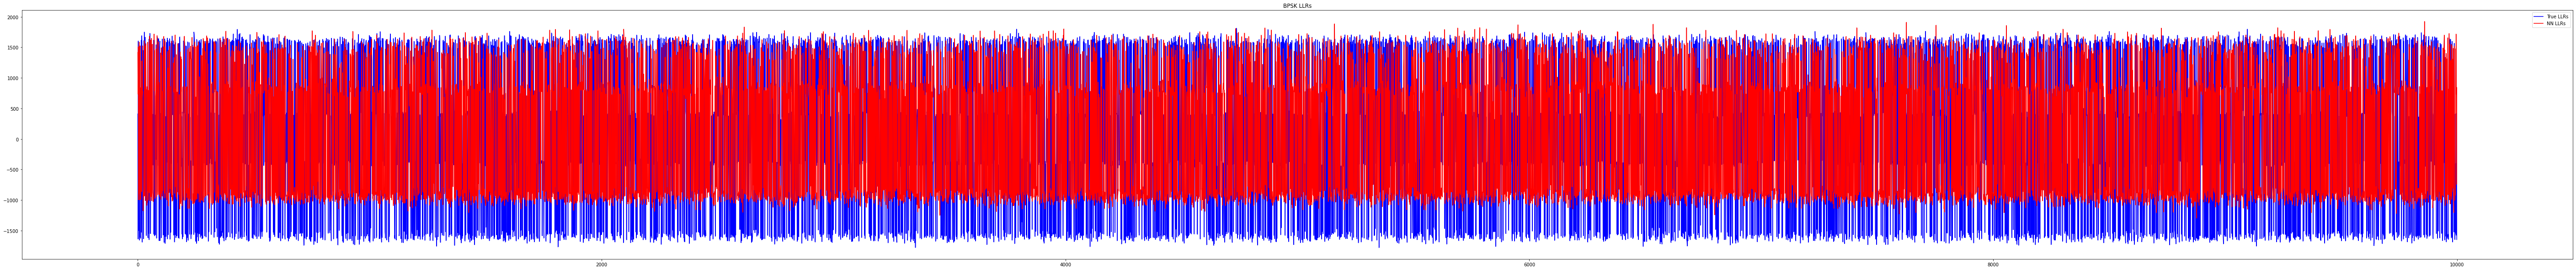

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,10))
pred_llrs0, pred_llrs1, pred_llrs2, pred_llrs3 = model.predict([sym_r[3], sym_i[3]], verbose = 1, batch_size = None)
print (pred_llrs0[0])
print (pred_llrs1[0])
plt.plot(LLR0[3][0],'b', label = 'True LLRs')
plt.plot(pred_llrs0[0],'r', label = 'NN LLRs')
plt.title('BPSK LLRs')
plt.legend()
plt.show()
fig.savefig("LLRs_16QAM_20.png")
    

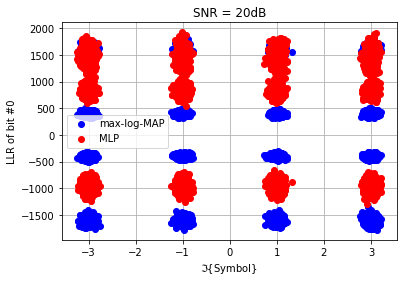

[1417.1312   733.67377 1509.7745  ...  910.8331  -744.8115   842.2536 ]


In [0]:
#print(pred_llrs[0])
#print(LLR[3][0])
fig3 = plt.figure()
plt.grid(True)
plt.scatter(sym_i[3], LLR0[3], c='b', label = 'max-log-MAP',zorder=2)
plt.scatter(sym_i[3], pred_llrs0[0], c='r', label = 'MLP',zorder=3)
plt.ylabel('LLR of bit #0')
plt.xlabel(r'$\Im$' + '{Symbol}')
plt.title('SNR = 20dB')
plt.legend()
fig3.savefig("Plots/16QAM_LLR_b0_20.png")
plt.show()
print (pred_llrs0[0])

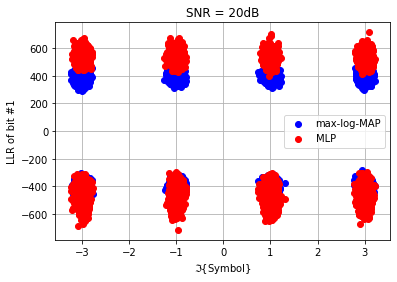

[1417.1312   733.67377 1509.7745  ...  910.8331  -744.8115   842.2536 ]


In [0]:
fig2 = plt.figure()
plt.grid(True)
plt.scatter(sym_i[3], LLR1[3], c='b', label = 'max-log-MAP',zorder=2)
plt.scatter(sym_i[3], pred_llrs1[0], c='r', label = 'MLP',zorder=3)
plt.ylabel('LLR of bit #1')
plt.xlabel(r'$\Im$' + '{Symbol}')
plt.title('SNR = 20dB')
plt.legend()
fig2.savefig("Plots/16QAM_LLR_b1_20.png")
plt.show()
print (pred_llrs0[0])

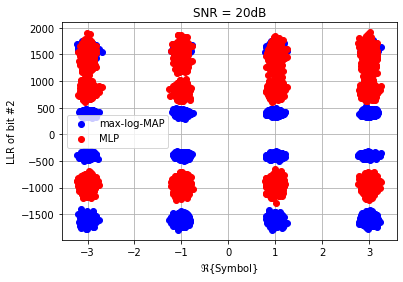

[1417.1312   733.67377 1509.7745  ...  910.8331  -744.8115   842.2536 ]


In [0]:
fig4 = plt.figure()
plt.grid(True)
plt.scatter(sym_r[3], LLR2[3], c='b', label = 'max-log-MAP',zorder=2)
plt.scatter(sym_r[3], pred_llrs2[0], c='r', label = 'MLP',zorder=3)
plt.ylabel('LLR of bit #2')
plt.xlabel(r'$\Re$' + '{Symbol}')
plt.title('SNR = 20dB')
plt.legend()
fig4.savefig("Plots/16QAM_LLR_b2_20.png")
plt.show()
print (pred_llrs0[0])

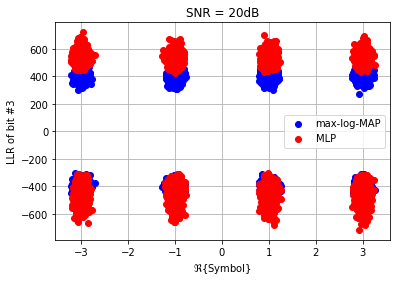

[1417.1312   733.67377 1509.7745  ...  910.8331  -744.8115   842.2536 ]


In [0]:
fig2 = plt.figure()
plt.grid(True)
plt.scatter(sym_r[3], LLR3[3], c='b', label = 'max-log-MAP',zorder=2)
plt.scatter(sym_r[3], pred_llrs3[0], c='r', label = 'MLP',zorder=3)
plt.ylabel('LLR of bit #3')
plt.xlabel(r'$\Re$' + '{Symbol}')
plt.title('SNR = 20dB')
plt.legend()
fig2.savefig("Plots/16QAM_LLR_b3_20.png")
plt.show()
print (pred_llrs0[0])